## Problem 2.2 (Exploring fish sleep data)

In [1]:
import numpy as np
import pandas as pd
import itertools

import altair as alt
import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

alt.data_transformers.enable('json')

/Users/chenxinhong/anaconda3/lib/python3.6/site-packages/bebi103/viz.py:30: UserWarning: DataShader import failed with error "No module named 'datashader'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions.""")


Loading BokehJS ...

DataTransformerRegistry.enable('json')

In [4]:
df_gt = pd.read_csv('../data/130315_1A_genotypes.txt',
                    delimiter='\t',
                    comment='#',
                    header=[0, 1])
# Take a look
df_gt.head()

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0


In [5]:
# Reset the columns to be the second level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

# Check out the new columns
df_gt.columns

Index(['WT 17', 'Het 34', 'Mut 22'], dtype='object')

In [6]:
df_gt.columns = ['wt', 'het', 'mut']


In [7]:
# Tidy the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [8]:
# Drop all rows that have a NaN in them
df_gt = df_gt.dropna()

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [9]:
df_gt = df_gt.reset_index(drop=True)


In [10]:
df_gt.loc[:,'location'] = df_gt.loc[:, 'location'].astype(int)


In [11]:
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [12]:
df = pd.merge(df, df_gt)

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het


In [13]:
df['time'] = pd.to_datetime(df['time'])

In [14]:
df['time'].dt.time.head()

0    18:31:09
1    18:32:09
2    18:33:09
3    18:34:09
4    18:35:09
Name: time, dtype: object

In [15]:
df['light'] = (  (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time < pd.to_datetime('23:00:00').time()))

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [16]:
inds = df['day'] == 5

In [17]:
# Calculate the median activity for each genotype 

median_df = df.groupby(['genotype', 'zeit_ind']).median().reset_index()

del median_df['location']

In [18]:
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light
0,het,-869,0.0,-14.480833,4,True
1,het,-868,0.0,-14.464167,4,True
2,het,-867,0.0,-14.447500,4,True
3,het,-866,0.0,-14.430833,4,True
4,het,-865,0.0,-14.414167,4,True


In [19]:
# define a function that use the condion of activity to generate a new column

def label_activity(c):
    if c['activity'] > 10:
        return'high'
    if (c['activity'] <= 10) & (c['activity'] > 0):
        return'low'
    if c['activity'] == 0:
        return'in'

In [20]:
median_df['type'] = median_df.apply(label_activity, axis = 1)
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


In [31]:
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type,rolling_acitivity (sec/2min),sleep
0,het,-869,0.0,-14.480833,4,True,in,NaN,true
1,het,-868,0.0,-14.464167,4,True,in,0.0,true
2,het,-867,0.0,-14.447500,4,True,in,0.0,true
3,het,-866,0.0,-14.430833,4,True,in,0.0,true
4,het,-865,0.0,-14.414167,4,True,in,0.0,true


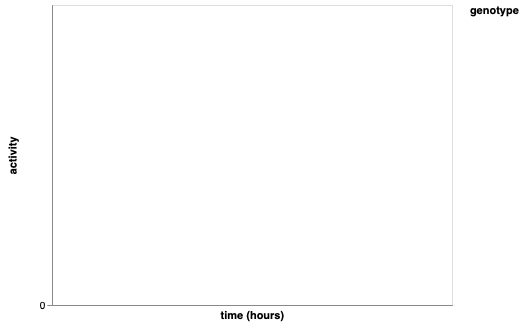

In [32]:
# Only extract the data of day5 (which is the agreement among zebrafish community)
inds = median_df['day'] == 5

alt.Chart(median_df.loc[inds,:]
    ).mark_line(
        strokeJoin='bevel'
    ).encode(
        x=alt.X('zeit:Q', title='time (hours)'),
        y='activity:Q',
        color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
        order='zeit:Q'
    )

in the paper, they defined resting bout as below:
'Any 1 min bin with zero detectable movement was considered 1 min of rest, a rest bout was defined as a continuous string of rest minutes'
And we decide to defined a sleep bout as 3 minutes of resting minutes

In [23]:
median_df = median_df.sort_values(by=['genotype', 'zeit_ind'])
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


In [24]:
# Create GroupBy object
grouped = median_df.groupby('genotype')['zeit_ind', 'activity']

# Make a RollingGroupby with window size of 3.
rolling = grouped.rolling(window=2, on='zeit_ind')

# Look at rolling object
rolling

RollingGroupby [window=2,center=False,axis=0,on=zeit_ind]

In [25]:
median_df_rolling = rolling.sum()

# Take a look
median_df_rolling.head()


zeit_ind  activity
genotype                      
het      0      -869       NaN
         1      -868       0.0
         2      -867       0.0
         3      -866       0.0
         4      -865       0.0

In [26]:
median_df_rolling = median_df_rolling.reset_index(level=0)
median_df_rolling.head()

,genotype,zeit_ind,activity
0,het,-869,NaN
1,het,-868,0.0
2,het,-867,0.0
3,het,-866,0.0
4,het,-865,0.0


In [27]:
median_df['rolling_acitivity (sec/2min)'] = median_df_rolling['activity']

median_df.head()


,genotype,zeit_ind,activity,zeit,day,light,type,rolling_acitivity (sec/2min)
0,het,-869,0.0,-14.480833,4,True,in,NaN
1,het,-868,0.0,-14.464167,4,True,in,0.0
2,het,-867,0.0,-14.447500,4,True,in,0.0
3,het,-866,0.0,-14.430833,4,True,in,0.0
4,het,-865,0.0,-14.414167,4,True,in,0.0


In [28]:
# define a function that use the condion of 2minutes of no movement to generate a new column

def label_sleep_bout(c):
    if c['activity'] == 0:
        return'true'
    else:
        return'false'

In [29]:
median_df['sleep'] = median_df.apply(label_sleep_bout, axis = 1)
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type,rolling_acitivity (sec/2min),sleep
0,het,-869,0.0,-14.480833,4,True,in,NaN,true
1,het,-868,0.0,-14.464167,4,True,in,0.0,true
2,het,-867,0.0,-14.447500,4,True,in,0.0,true
3,het,-866,0.0,-14.430833,4,True,in,0.0,true
4,het,-865,0.0,-14.414167,4,True,in,0.0,true


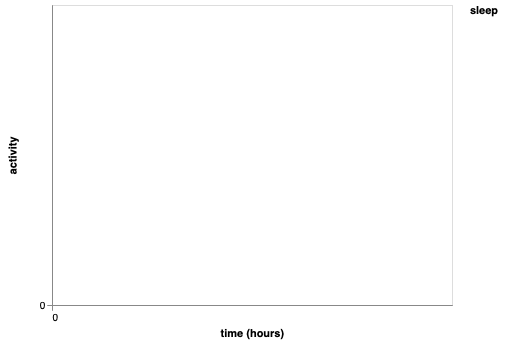

In [30]:
# Only extract the data of day5 (which is the agreement among zebrafish community)
inds1 = (median_df['day'] == 5) & (median_df['genotype'] == 'wt')

alt.Chart(median_df.loc[inds1,:]
    ).mark_point(
        
    ).encode(
        x=alt.X('zeit:Q', title='time (hours)'),
        y='activity:Q',
        color=alt.Color('sleep:N'),
        order='zeit:Q'
    )